## Credit Card Fraud Detection - Data Exploration


**Objective**: Comprehensive exploration of the credit card fraud dataset to understand:
- Data structure and quality
- Class distribution and imbalance
- Feature distributions and relationships
- Fraud patterns and anomalies
- Business insights for TD Bank use case

### 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [4]:
# Configuration
warnings.filterwarnings('ignore')
#plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

print("📊 Starting Credit Card Fraud Detection - Data Exploration")
print("🏦 Bank Use Case: Understanding fraud patterns for regulatory compliance")

# %%
# Load the dataset
data_path = '../data/raw/creditcard.csv'
df = pd.read_csv(data_path)

print(f"✅ Dataset loaded successfully!")
print(f"📋 Shape: {df.shape}")
print(f"📊 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📊 Starting Credit Card Fraud Detection - Data Exploration
🏦 Bank Use Case: Understanding fraud patterns for regulatory compliance
✅ Dataset loaded successfully!
📋 Shape: (284807, 31)
📊 Memory usage: 67.36 MB


### 2. Initial Data Overview

In [5]:
# Basic dataset information
print("🔍 DATASET OVERVIEW")
print("="*50)
print(f"📊 Rows: {df.shape[0]:,}")
print(f"📊 Columns: {df.shape[1]:,}")
print(f"📊 Total cells: {df.shape[0] * df.shape[1]:,}")

# Display first few rows
print("\n📋 First 5 rows:")
display(df.head())

# Data types and basic info
print("\n📊 Data Types:")
print(df.dtypes.value_counts())

print("\n🔍 Dataset Info:")
df.info()

🔍 DATASET OVERVIEW
📊 Rows: 284,807
📊 Columns: 31
📊 Total cells: 8,829,017

📋 First 5 rows:


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0


📊 Data Types:
float64    30
int64       1
dtype: int64

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     28480

### 3. Data Quality Assessment

In [7]:
def assess_data_quality(df):
    """Comprehensive data quality assessment"""
    
    print("🔍 DATA QUALITY ASSESSMENT")
    print("="*50)
    
    # Missing values
    missing_data = df.isnull().sum()
    missing_pct = (missing_data / len(df)) * 100
    
    missing_summary = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Count', ascending=False)
    
    print("📊 Missing Values Summary:")
    print(missing_summary[missing_summary['Missing_Count'] > 0])
    
    if missing_summary['Missing_Count'].sum() == 0:
        print("✅ No missing values found!")
    
    # Duplicate rows
    duplicates = df.duplicated().sum()
    print(f"\n📊 Duplicate rows: {duplicates}")
    
    # Data types consistency
    print(f"\n📊 Data types:")
    for dtype in df.dtypes.unique():
        cols = df.select_dtypes(include=[dtype]).columns.tolist()
        print(f"   {dtype}: {len(cols)} columns")
    
    # Memory usage
    print(f"\n📊 Memory Usage:")
    print(f"   Total: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return missing_summary

missing_summary = assess_data_quality(df)

🔍 DATA QUALITY ASSESSMENT
📊 Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found!

📊 Duplicate rows: 1081

📊 Data types:
   float64: 30 columns
   int64: 1 columns

📊 Memory Usage:
   Total: 67.36 MB


### 4. Target Variable Analysis

🎯 TARGET VARIABLE ANALYSIS
📊 Class Distribution:
   Normal transactions: 284,315 (99.827%)
   Fraud transactions: 492 (0.173%)
📊 Imbalance Ratio: 577.9:1


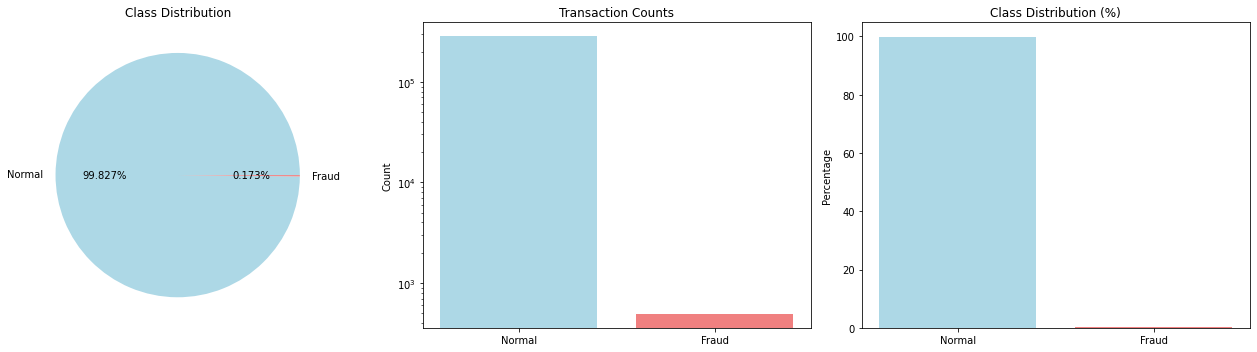

In [9]:
# Class distribution analysis
print("🎯 TARGET VARIABLE ANALYSIS")
print("="*50)

# Basic statistics
fraud_counts = df['Class'].value_counts()
fraud_pct = df['Class'].value_counts(normalize=True) * 100

print("📊 Class Distribution:")
print(f"   Normal transactions: {fraud_counts[0]:,} ({fraud_pct[0]:.3f}%)")
print(f"   Fraud transactions: {fraud_counts[1]:,} ({fraud_pct[1]:.3f}%)")

# Imbalance ratio
imbalance_ratio = fraud_counts[0] / fraud_counts[1]
print(f"📊 Imbalance Ratio: {imbalance_ratio:.1f}:1")

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Pie chart
axes[0].pie(fraud_counts.values, labels=['Normal', 'Fraud'], autopct='%1.3f%%', 
           colors=['lightblue', 'lightcoral'])
axes[0].set_title('Class Distribution')

# Bar chart
axes[1].bar(['Normal', 'Fraud'], fraud_counts.values, color=['lightblue', 'lightcoral'])
axes[1].set_ylabel('Count')
axes[1].set_title('Transaction Counts')
axes[1].set_yscale('log')  # Log scale due to imbalance

# Percentage bar chart
axes[2].bar(['Normal', 'Fraud'], fraud_pct.values, color=['lightblue', 'lightcoral'])
axes[2].set_ylabel('Percentage')
axes[2].set_title('Class Distribution (%)')

plt.tight_layout()
plt.show()

### 5. Feature Analysis

In [10]:
# Feature statistics
print("📊 FEATURE ANALYSIS")
print("="*50)

# Separate features
amount_col = 'Amount'
time_col = 'Time'
pca_cols = [col for col in df.columns if col.startswith('V')]
target_col = 'Class'

print(f"📊 Feature breakdown:")
print(f"   Time feature: {time_col}")
print(f"   Amount feature: {amount_col}")
print(f"   PCA features: {len(pca_cols)} (V1-V28)")
print(f"   Target variable: {target_col}")

# Basic statistics for numerical features
numerical_stats = df.describe()
print(f"\n📊 Numerical Features Summary:")
display(numerical_stats)

📊 FEATURE ANALYSIS
📊 Feature breakdown:
   Time feature: Time
   Amount feature: Amount
   PCA features: 28 (V1-V28)
   Target variable: Class

📊 Numerical Features Summary:


Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

### 6. Amount Feature Deep Dive

💰 AMOUNT FEATURE ANALYSIS
📊 Amount Statistics by Class:


count      mean  median       std  min       max     skew
Class                                                            
0      284315   88.2910   22.00  250.1051  0.0  25691.16  17.0031
1         492  122.2113    9.25  256.6833  0.0   2125.87   3.7545


📊 Mann-Whitney U Test:
   Statistic: 78049581.00
   P-value: 8.58e-06
   Significant difference: Yes


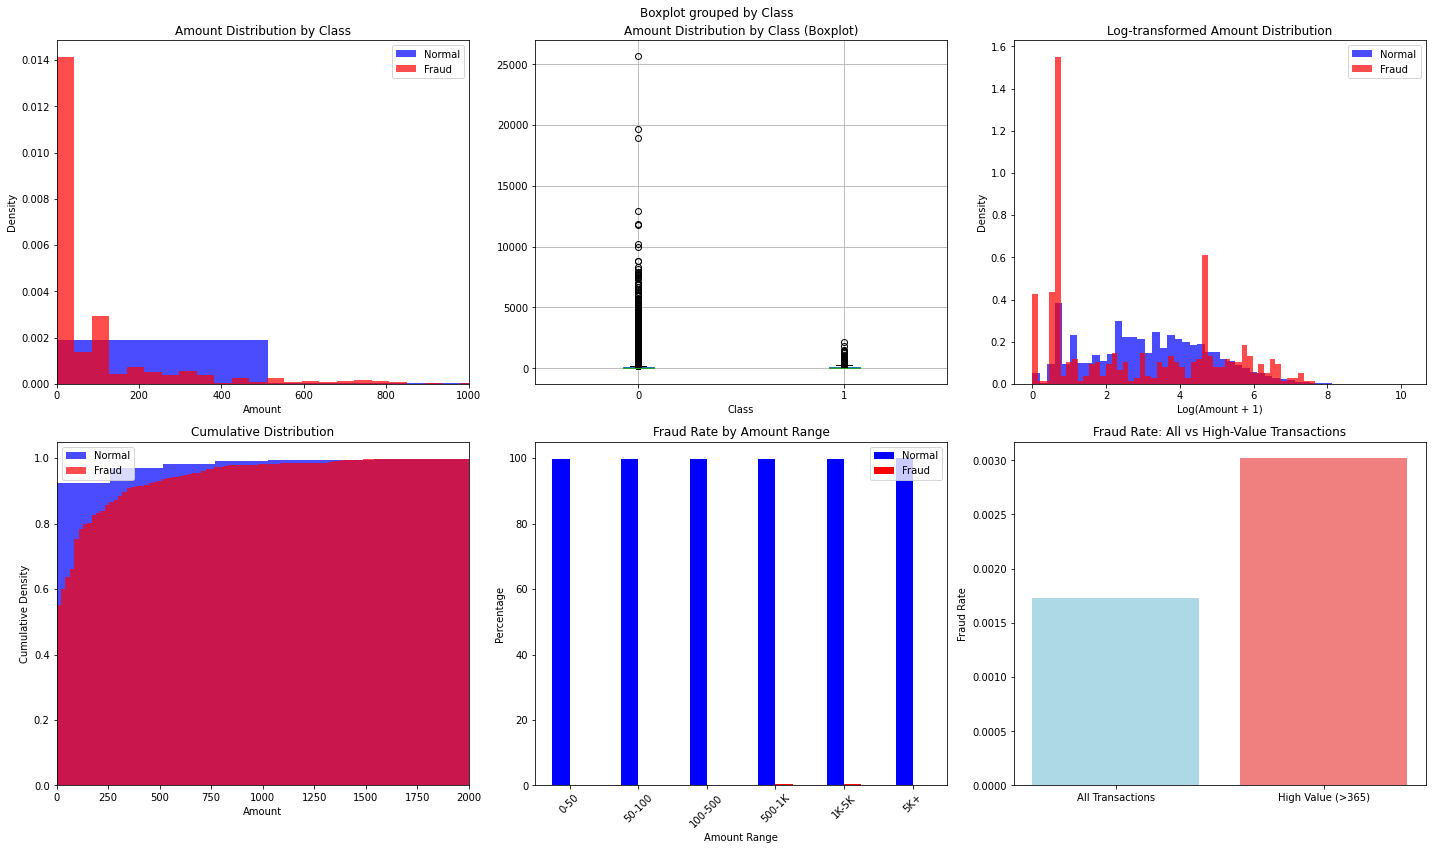


💡 Key Insights:
   • Average fraud amount: $122.21
   • Average normal amount: $88.29
   • High-value fraud rate: 0.003


In [11]:
print("💰 AMOUNT FEATURE ANALYSIS")
print("="*50)

# Amount statistics by class
amount_stats = df.groupby('Class')['Amount'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max', 'skew'
]).round(4)

print("📊 Amount Statistics by Class:")
display(amount_stats)

# Statistical significance test
normal_amounts = df[df['Class'] == 0]['Amount']
fraud_amounts = df[df['Class'] == 1]['Amount']

# Mann-Whitney U test (non-parametric)
from scipy.stats import mannwhitneyu, kstest
stat, p_value = mannwhitneyu(normal_amounts, fraud_amounts, alternative='two-sided')
print(f"\n📊 Mann-Whitney U Test:")
print(f"   Statistic: {stat:.2f}")
print(f"   P-value: {p_value:.2e}")
print(f"   Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Distribution comparison
axes[0, 0].hist(normal_amounts, bins=50, alpha=0.7, label='Normal', color='blue', density=True)
axes[0, 0].hist(fraud_amounts, bins=50, alpha=0.7, label='Fraud', color='red', density=True)
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Amount Distribution by Class')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 1000)  # Focus on main range

# Box plot
df.boxplot(column='Amount', by='Class', ax=axes[0, 1])
axes[0, 1].set_title('Amount Distribution by Class (Boxplot)')
axes[0, 1].set_xlabel('Class')

# Log scale distribution
axes[0, 2].hist(np.log1p(normal_amounts), bins=50, alpha=0.7, label='Normal', color='blue', density=True)
axes[0, 2].hist(np.log1p(fraud_amounts), bins=50, alpha=0.7, label='Fraud', color='red', density=True)
axes[0, 2].set_xlabel('Log(Amount + 1)')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Log-transformed Amount Distribution')
axes[0, 2].legend()

# Cumulative distribution
axes[1, 0].hist(normal_amounts, bins=100, alpha=0.7, label='Normal', color='blue', 
               density=True, cumulative=True)
axes[1, 0].hist(fraud_amounts, bins=100, alpha=0.7, label='Fraud', color='red', 
               density=True, cumulative=True)
axes[1, 0].set_xlabel('Amount')
axes[1, 0].set_ylabel('Cumulative Density')
axes[1, 0].set_title('Cumulative Distribution')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, 2000)

# Amount ranges analysis
amount_ranges = pd.cut(df['Amount'], bins=[0, 50, 100, 500, 1000, 5000, df['Amount'].max()], 
                      labels=['0-50', '50-100', '100-500', '500-1K', '1K-5K', '5K+'])
range_analysis = pd.crosstab(amount_ranges, df['Class'], normalize='index') * 100

range_analysis.plot(kind='bar', ax=axes[1, 1], color=['blue', 'red'])
axes[1, 1].set_title('Fraud Rate by Amount Range')
axes[1, 1].set_xlabel('Amount Range')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(['Normal', 'Fraud'])
axes[1, 1].tick_params(axis='x', rotation=45)

# High-value transactions analysis
high_value_threshold = df['Amount'].quantile(0.95)
high_value_fraud_rate = df[df['Amount'] >= high_value_threshold]['Class'].mean()

axes[1, 2].bar(['All Transactions', f'High Value (>{high_value_threshold:.0f})'], 
              [df['Class'].mean(), high_value_fraud_rate],
              color=['lightblue', 'lightcoral'])
axes[1, 2].set_ylabel('Fraud Rate')
axes[1, 2].set_title('Fraud Rate: All vs High-Value Transactions')

plt.tight_layout()
plt.show()

print(f"\n💡 Key Insights:")
print(f"   • Average fraud amount: ${fraud_amounts.mean():.2f}")
print(f"   • Average normal amount: ${normal_amounts.mean():.2f}")
print(f"   • High-value fraud rate: {high_value_fraud_rate:.3f}")


### 7. Time Feature Analysis

⏰ TIME FEATURE ANALYSIS
📊 Time Statistics by Class (seconds):


count      mean   median       std    min       max
Class                                                      
0      284315  94838.20  84711.0  47484.02    0.0  172792.0
1         492  80746.81  75568.5  47835.37  406.0  170348.0

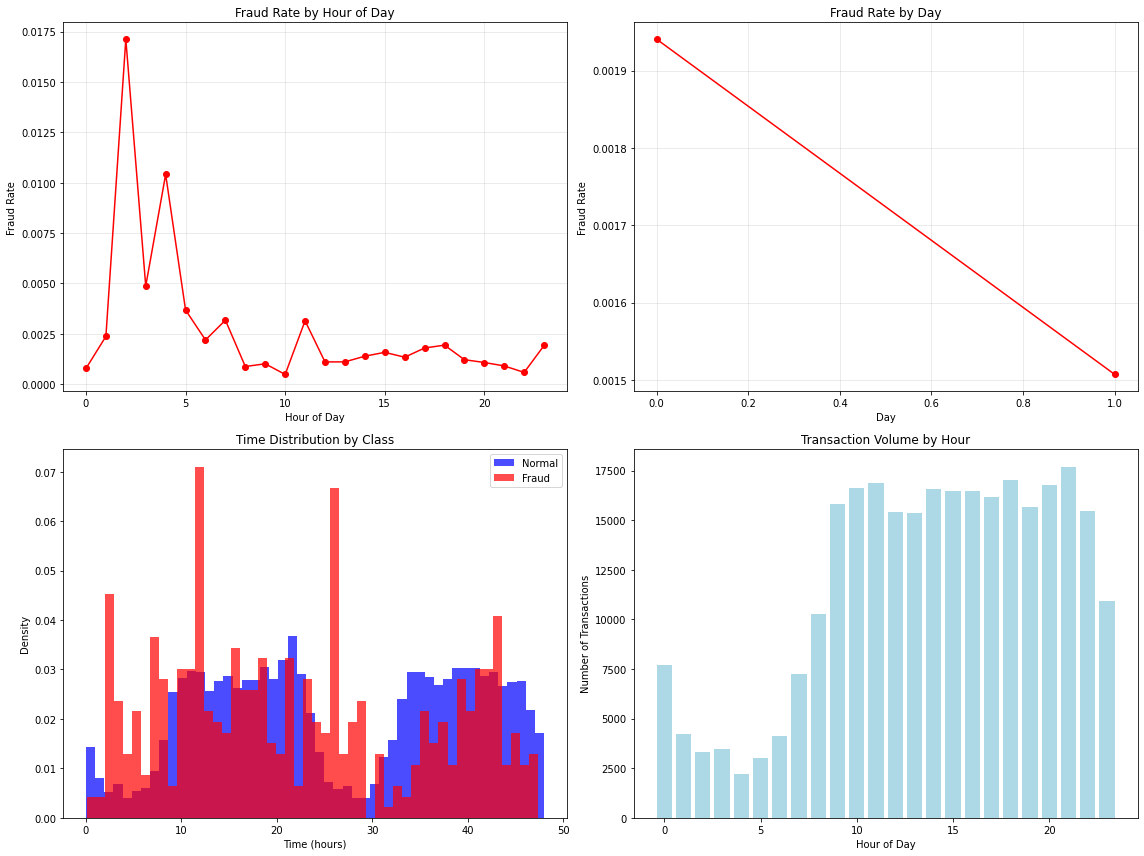


💼 Business Hours Analysis:
   • Business hours fraud rate: 0.0014
   • Non-business hours fraud rate: 0.0020
   • Risk ratio: 1.42x higher outside business hours


In [12]:
print("⏰ TIME FEATURE ANALYSIS")
print("="*50)

# Convert time to hours, days, etc.
df['Time_hours'] = df['Time'] / 3600
df['Time_days'] = df['Time'] / (3600 * 24)

# Time statistics
time_stats = df.groupby('Class')['Time'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("📊 Time Statistics by Class (seconds):")
display(time_stats)

# Time-based fraud analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Hourly analysis
df['Hour'] = (df['Time'] // 3600) % 24
hourly_fraud = df.groupby('Hour')['Class'].agg(['count', 'sum', 'mean']).reset_index()
hourly_fraud['fraud_rate'] = hourly_fraud['mean']

axes[0, 0].plot(hourly_fraud['Hour'], hourly_fraud['fraud_rate'], marker='o', color='red')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Fraud Rate')
axes[0, 0].set_title('Fraud Rate by Hour of Day')
axes[0, 0].grid(True, alpha=0.3)

# Daily analysis
daily_fraud = df.groupby(df['Time_days'].astype(int))['Class'].agg(['count', 'sum', 'mean']).reset_index()
daily_fraud['fraud_rate'] = daily_fraud['mean']

axes[0, 1].plot(daily_fraud['Time_days'], daily_fraud['fraud_rate'], marker='o', color='red')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Fraud Rate')
axes[0, 1].set_title('Fraud Rate by Day')
axes[0, 1].grid(True, alpha=0.3)

# Time distribution comparison
axes[1, 0].hist(df[df['Class'] == 0]['Time_hours'], bins=50, alpha=0.7, 
               label='Normal', color='blue', density=True)
axes[1, 0].hist(df[df['Class'] == 1]['Time_hours'], bins=50, alpha=0.7, 
               label='Fraud', color='red', density=True)
axes[1, 0].set_xlabel('Time (hours)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Time Distribution by Class')
axes[1, 0].legend()

# Transaction volume by hour
transaction_volume = df.groupby('Hour').size()
axes[1, 1].bar(transaction_volume.index, transaction_volume.values, color='lightblue')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Transactions')
axes[1, 1].set_title('Transaction Volume by Hour')

plt.tight_layout()
plt.show()

# Business hours analysis
business_hours = list(range(9, 17))  # 9 AM to 5 PM
business_fraud_rate = df[df['Hour'].isin(business_hours)]['Class'].mean()
non_business_fraud_rate = df[~df['Hour'].isin(business_hours)]['Class'].mean()

print(f"\n💼 Business Hours Analysis:")
print(f"   • Business hours fraud rate: {business_fraud_rate:.4f}")
print(f"   • Non-business hours fraud rate: {non_business_fraud_rate:.4f}")
print(f"   • Risk ratio: {non_business_fraud_rate/business_fraud_rate:.2f}x higher outside business hours")


### 8. PCA Features Analysis

🔍 PCA FEATURES ANALYSIS
📊 PCA Features Summary:


V1           V2           V3           V4           V5  \
count  284807.0000  284807.0000  284807.0000  284807.0000  284807.0000   
mean        0.0000       0.0000      -0.0000       0.0000       0.0000   
std         1.9587       1.6513       1.5163       1.4159       1.3802   
min       -56.4075     -72.7157     -48.3256      -5.6832    -113.7433   
25%        -0.9204      -0.5985      -0.8904      -0.8486      -0.6916   
50%         0.0181       0.0655       0.1798      -0.0198      -0.0543   
75%         1.3156       0.8037       1.0272       0.7433       0.6119   
max         2.4549      22.0577       9.3826      16.8753      34.8017   

                V6           V7           V8           V9          V10  \
count  284807.0000  284807.0000  284807.0000  284807.0000  284807.0000   
mean        0.0000      -0.0000       0.0000      -0.0000       0.0000   
std         1.3323       1.2371       1.1944       1.0986       1.0888   
min       -26.1605     -43.5572     -73.2167     -13.4341     -24.5883   
25%        -0.7683      -0.5541      -0.2086      -0.6431      -0.5354   
50%        -0.2742       0.0401       0.0224      -0.0514      -0.0929   
75%         0.3986       0.5704       0.3273       0.5971       0.4539   
max        73.3016     120.5895      20.0072      15.5950      23.7451   

               V11          V12          V13          V14          V15  \
count  284807.0000  284807.0000  284807.0000  284807.0000  284807.0000   
mean        0.0000      -0.0000       0.0000       0.0000       0.0000   
std         1.0207       0.9992       0.9953       0.9586       0.9153   
min        -4.7975     -18.6837      -5.7919     -19.2143      -4.4989   
25%        -0.7625      -0.4056      -0.6485      -0.4256      -0.5829   
50%        -0.0328       0.1400      -0.0136       0.0506       0.0481   
75%         0.7396       0.6182       0.6625       0.4931       0.6488   
max        12.0189       7.8484       7.1269      10.5268       8.8777   

               V16          V17          V18          V19          V20  \
count  284807.0000  284807.0000  284807.0000  284807.0000  284807.0000   
mean        0.0000      -0.0000       0.0000       0.0000       0.0000   
std         0.8763       0.8493       0.8382       0.8140       0.7709   
min       -14.1299     -25.1628      -9.4987      -7.2135     -54.4977   
25%        -0.4680      -0.4837      -0.4988      -0.4563      -0.2117   
50%         0.0664      -0.0657      -0.0036       0.0037      -0.0625   
75%         0.5233       0.3997       0.5008       0.4589       0.1330   
max        17.3151       9.2535       5.0411       5.5920      39.4209   

               V21          V22          V23          V24          V25  \
count  284807.0000  284807.0000  284807.0000  284807.0000  284807.0000   
mean        0.0000      -0.0000       0.0000       0.0000       0.0000   
std         0.7345       0.7257       0.6245       0.6056       0.5213   
min       -34.8304     -10.9331     -44.8077      -2.8366     -10.2954   
25%        -0.2284      -0.5424      -0.1618      -0.3546      -0.3171   
50%        -0.0295       0.0068      -0.0112       0.0410       0.0166   
75%         0.1864       0.5286       0.1476       0.4395       0.3507   
max        27.2028      10.5031      22.5284       4.5845       7.5196   

               V26          V27          V28  
count  284807.0000  284807.0000  284807.0000  
mean        0.0000      -0.0000      -0.0000  
std         0.4822       0.4036       0.3301  
min        -2.6046     -22.5657     -15.4301  
25%        -0.3270      -0.0708      -0.0530  
50%        -0.0521       0.0013       0.0112  
75%         0.2410       0.0910       0.0783  
max         3.5173      31.6122      33.8478


📊 PCA Features Correlation with Target:
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64


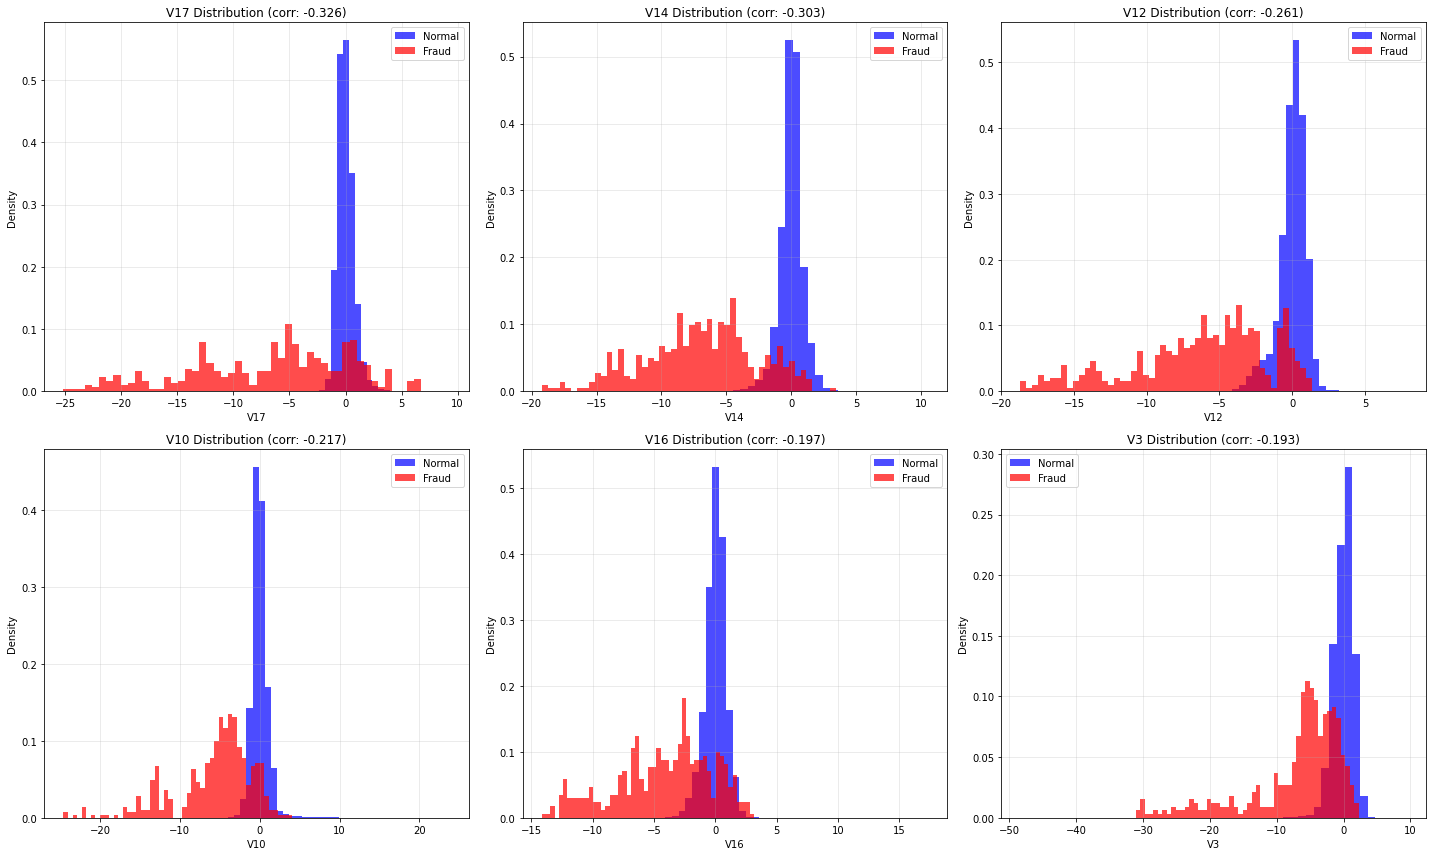

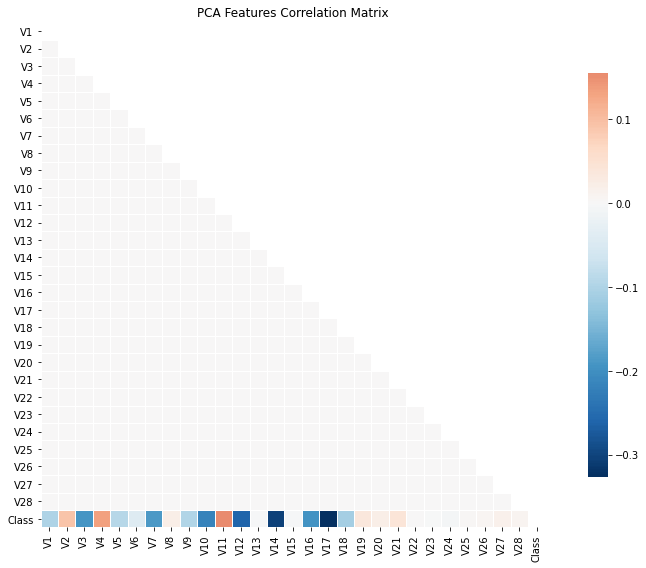

In [13]:
print("🔍 PCA FEATURES ANALYSIS")
print("="*50)

# PCA features statistics
pca_stats = df[pca_cols].describe()
print("📊 PCA Features Summary:")
display(pca_stats.round(4))

# Correlation analysis
print("\n📊 PCA Features Correlation with Target:")
pca_target_corr = df[pca_cols + ['Class']].corr()['Class'].drop('Class').sort_values(key=abs, ascending=False)
print(pca_target_corr.head(10))

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Top correlated features distribution
top_features = pca_target_corr.head(6).index

for i, feature in enumerate(top_features):
    row = i // 3
    col = i % 3
    
    # Distribution by class
    normal_vals = df[df['Class'] == 0][feature]
    fraud_vals = df[df['Class'] == 1][feature]
    
    axes[row, col].hist(normal_vals, bins=50, alpha=0.7, label='Normal', color='blue', density=True)
    axes[row, col].hist(fraud_vals, bins=50, alpha=0.7, label='Fraud', color='red', density=True)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Density')
    axes[row, col].set_title(f'{feature} Distribution (corr: {pca_target_corr[feature]:.3f})')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[pca_cols + ['Class']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, center=0, cmap='RdBu_r', 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('PCA Features Correlation Matrix')
plt.tight_layout()
plt.show()

### 9. Advanced Pattern Analysis

🔍 ADVANCED PATTERN ANALYSIS
📊 Amount Outliers:
   • Total outliers: 31,904
   • Fraud in outliers: 91
   • Fraud rate in outliers: 0.0029

📊 Feature Interactions:


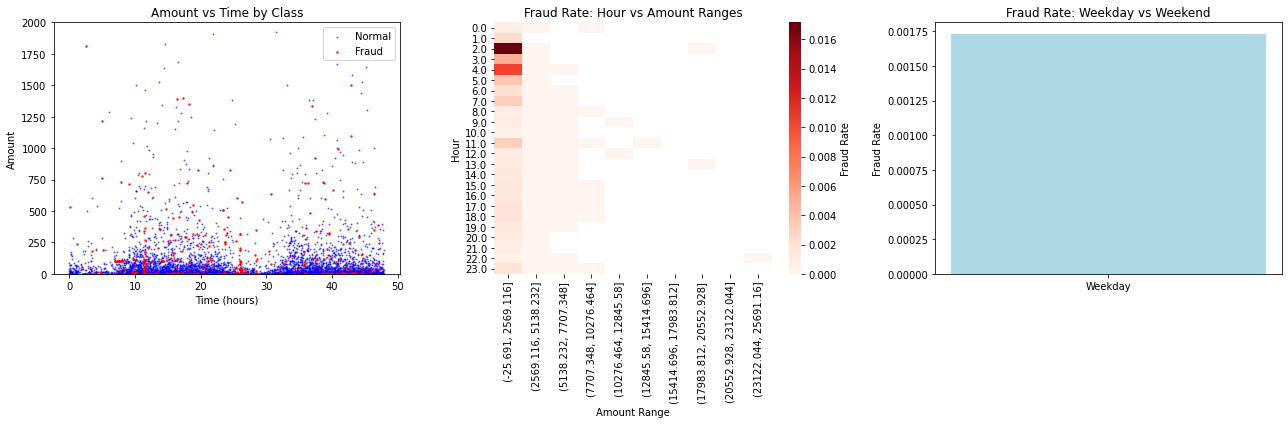

📊 Weekend vs Weekday Analysis:
   • Weekday fraud rate: 0.0017
   • Weekend fraud rate: nan


In [14]:
print("🔍 ADVANCED PATTERN ANALYSIS")
print("="*50)

# Outlier analysis using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Analyze outliers in Amount
amount_outliers = detect_outliers_iqr(df, 'Amount')
print(f"📊 Amount Outliers:")
print(f"   • Total outliers: {len(amount_outliers):,}")
print(f"   • Fraud in outliers: {amount_outliers['Class'].sum():,}")
print(f"   • Fraud rate in outliers: {amount_outliers['Class'].mean():.4f}")

# Feature interaction analysis
print(f"\n📊 Feature Interactions:")

# Amount vs Time interaction
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot with fraud highlighting
normal_data = df[df['Class'] == 0].sample(n=5000)  # Sample for visualization
fraud_data = df[df['Class'] == 1]

axes[0].scatter(normal_data['Time_hours'], normal_data['Amount'], 
               alpha=0.5, s=1, color='blue', label='Normal')
axes[0].scatter(fraud_data['Time_hours'], fraud_data['Amount'], 
               alpha=0.8, s=2, color='red', label='Fraud')
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Amount')
axes[0].set_title('Amount vs Time by Class')
axes[0].legend()
axes[0].set_ylim(0, 2000)  # Focus on main range

# Hour vs Amount heatmap
hour_amount_fraud = df.groupby(['Hour', pd.cut(df['Amount'], bins=10)])['Class'].mean().unstack()
sns.heatmap(hour_amount_fraud, ax=axes[1], cmap='Reds', cbar_kws={'label': 'Fraud Rate'})
axes[1].set_title('Fraud Rate: Hour vs Amount Ranges')
axes[1].set_xlabel('Amount Range')
axes[1].set_ylabel('Hour')

# Weekend vs weekday analysis (assuming 2-day cycle)
df['Day_of_cycle'] = (df['Time_days'] % 7).astype(int)
weekend_fraud = df[df['Day_of_cycle'].isin([5, 6])]['Class'].mean()
weekday_fraud = df[~df['Day_of_cycle'].isin([5, 6])]['Class'].mean()

axes[2].bar(['Weekday', 'Weekend'], [weekday_fraud, weekend_fraud], 
           color=['lightblue', 'lightcoral'])
axes[2].set_ylabel('Fraud Rate')
axes[2].set_title('Fraud Rate: Weekday vs Weekend')

plt.tight_layout()
plt.show()

print(f"📊 Weekend vs Weekday Analysis:")
print(f"   • Weekday fraud rate: {weekday_fraud:.4f}")
print(f"   • Weekend fraud rate: {weekend_fraud:.4f}")


### 10. Dimensionality Reduction Visualization

🎨 DIMENSIONALITY REDUCTION VISUALIZATION
🔄 Computing t-SNE... (this may take a moment)


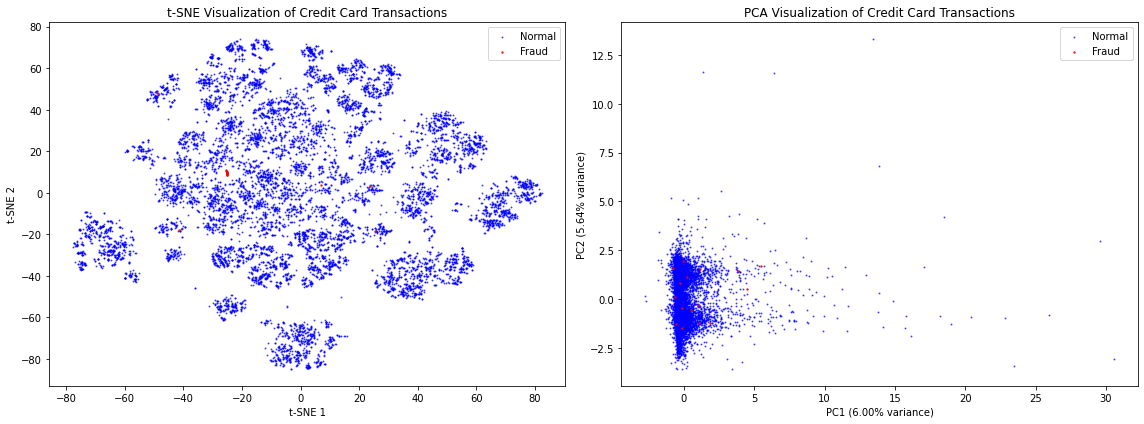

📊 PCA Explained Variance:
   • PC1: 6.00%
   • PC2: 5.64%
   • Total (PC1+PC2): 11.64%


In [15]:
print("🎨 DIMENSIONALITY REDUCTION VISUALIZATION")
print("="*50)

# Sample data for visualization (t-SNE is computationally expensive)
sample_size = 10000
sample_df = df.sample(n=sample_size, random_state=42)

# Prepare features for dimensionality reduction
features_for_reduction = sample_df[pca_cols + ['Amount', 'Time']].values
labels = sample_df['Class'].values

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_reduction)

# t-SNE visualization
print("🔄 Computing t-SNE... (this may take a moment)")
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
tsne_features = tsne.fit_transform(features_scaled)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# t-SNE plot
normal_idx = labels == 0
fraud_idx = labels == 1

axes[0].scatter(tsne_features[normal_idx, 0], tsne_features[normal_idx, 1], 
               alpha=0.6, s=1, color='blue', label='Normal')
axes[0].scatter(tsne_features[fraud_idx, 0], tsne_features[fraud_idx, 1], 
               alpha=0.8, s=2, color='red', label='Fraud')
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')
axes[0].set_title('t-SNE Visualization of Credit Card Transactions')
axes[0].legend()

# PCA plot (using first two principal components)
pca_2d = PCA(n_components=2)
pca_features = pca_2d.fit_transform(features_scaled)

axes[1].scatter(pca_features[normal_idx, 0], pca_features[normal_idx, 1], 
               alpha=0.6, s=1, color='blue', label='Normal')
axes[1].scatter(pca_features[fraud_idx, 0], pca_features[fraud_idx, 1], 
               alpha=0.8, s=2, color='red', label='Fraud')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
axes[1].set_title('PCA Visualization of Credit Card Transactions')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"📊 PCA Explained Variance:")
print(f"   • PC1: {pca_2d.explained_variance_ratio_[0]:.2%}")
print(f"   • PC2: {pca_2d.explained_variance_ratio_[1]:.2%}")
print(f"   • Total (PC1+PC2): {pca_2d.explained_variance_ratio_.sum():.2%}")


### 11. Business Intelligence Summary

In [16]:
print("💼 BUSINESS INTELLIGENCE SUMMARY")
print("="*60)

# Key metrics for TD Bank
total_transactions = len(df)
total_fraud = df['Class'].sum()
total_fraud_amount = df[df['Class'] == 1]['Amount'].sum()
total_normal_amount = df[df['Class'] == 0]['Amount'].sum()
avg_fraud_amount = df[df['Class'] == 1]['Amount'].mean()
avg_normal_amount = df[df['Class'] == 0]['Amount'].mean()

print(f"🏦 TD BANK FRAUD DETECTION INSIGHTS")
print(f"{'='*50}")
print(f"📊 Dataset Overview:")
print(f"   • Total transactions: {total_transactions:,}")
print(f"   • Fraud cases: {total_fraud:,}")
print(f"   • Fraud rate: {(total_fraud/total_transactions)*100:.3f}%")
print(f"   • Imbalance ratio: {(total_transactions-total_fraud)/total_fraud:.0f}:1")

print(f"\n💰 Financial Impact:")
print(f"   • Total fraud amount: ${total_fraud_amount:,.2f}")
print(f"   • Average fraud transaction: ${avg_fraud_amount:.2f}")
print(f"   • Average normal transaction: ${avg_normal_amount:.2f}")
print(f"   • Fraud amount ratio: {avg_fraud_amount/avg_normal_amount:.2f}x")

print(f"\n⏰ Temporal Patterns:")
print(f"   • Highest fraud hour: {hourly_fraud.loc[hourly_fraud['fraud_rate'].idxmax(), 'Hour']}")
print(f"   • Business hours risk: {business_fraud_rate:.4f}")
print(f"   • After hours risk: {non_business_fraud_rate:.4f}")
print(f"   • Night-time multiplier: {non_business_fraud_rate/business_fraud_rate:.2f}x")

print(f"\n🔍 Feature Insights:")
print(f"   • Most predictive PCA feature: {pca_target_corr.index[0]} (corr: {pca_target_corr.iloc[0]:.3f})")
print(f"   • High-value transaction risk: {high_value_fraud_rate:.4f}")
print(f"   • Amount outlier fraud rate: {amount_outliers['Class'].mean():.4f}")

print(f"\n📋 Regulatory Compliance Notes:")
print(f"   • Data quality: No missing values ✅")
print(f"   • Feature anonymization: PCA features protect privacy ✅")
print(f"   • Temporal coverage: {df['Time_days'].max():.1f} days")
print(f"   • Class imbalance: Requires careful model evaluation")

💼 BUSINESS INTELLIGENCE SUMMARY
🏦 TD BANK FRAUD DETECTION INSIGHTS
📊 Dataset Overview:
   • Total transactions: 284,807
   • Fraud cases: 492
   • Fraud rate: 0.173%
   • Imbalance ratio: 578:1

💰 Financial Impact:
   • Total fraud amount: $60,127.97
   • Average fraud transaction: $122.21
   • Average normal transaction: $88.29
   • Fraud amount ratio: 1.38x

⏰ Temporal Patterns:
   • Highest fraud hour: 2.0
   • Business hours risk: 0.0014
   • After hours risk: 0.0020
   • Night-time multiplier: 1.42x

🔍 Feature Insights:
   • Most predictive PCA feature: V17 (corr: -0.326)
   • High-value transaction risk: 0.0030
   • Amount outlier fraud rate: 0.0029

📋 Regulatory Compliance Notes:
   • Data quality: No missing values ✅
   • Feature anonymization: PCA features protect privacy ✅
   • Temporal coverage: 2.0 days
   • Class imbalance: Requires careful model evaluation


### 12. Recommendations for Model Development

In [17]:
print("🎯 RECOMMENDATIONS FOR MODEL DEVELOPMENT")
print("="*60)

recommendations = [
    "🔧 Data Preprocessing:",
    "   • No missing value imputation needed",
    "   • Consider log transformation for Amount feature",
    "   • Standardize PCA features (already normalized)",
    "   • Create time-based features (hour, day, weekend)",
    "",
    "⚖️ Class Imbalance Handling:",
    "   • Use stratified sampling for train/test split",
    "   • Consider SMOTE or ADASYN for synthetic oversampling",
    "   • Implement class weights in model training",
    "   • Focus on precision-recall rather than accuracy",
    "",
    "🎨 Feature Engineering:",
    "   • Create amount ranges/categories",
    "   • Engineer time-based features (business hours, weekend)",
    "   • Consider PCA feature interactions",
    "   • Add rolling statistics for sequential patterns",
    "",
    "📊 Model Evaluation:",
    "   • Use AUC-ROC and AUC-PR metrics",
    "   • Implement cost-sensitive evaluation",
    "   • Cross-validation with stratification",
    "   • Threshold tuning for optimal precision-recall",
    "",
    "🏦 Business Considerations:",
    "   • Interpretability for regulatory compliance",
    "   • Real-time inference capabilities",
    "   • False positive cost analysis",
    "   • Regular model retraining schedule"
]

for rec in recommendations:
    print(rec)

🎯 RECOMMENDATIONS FOR MODEL DEVELOPMENT
🔧 Data Preprocessing:
   • No missing value imputation needed
   • Consider log transformation for Amount feature
   • Standardize PCA features (already normalized)
   • Create time-based features (hour, day, weekend)

⚖️ Class Imbalance Handling:
   • Use stratified sampling for train/test split
   • Consider SMOTE or ADASYN for synthetic oversampling
   • Implement class weights in model training
   • Focus on precision-recall rather than accuracy

🎨 Feature Engineering:
   • Create amount ranges/categories
   • Engineer time-based features (business hours, weekend)
   • Consider PCA feature interactions
   • Add rolling statistics for sequential patterns

📊 Model Evaluation:
   • Use AUC-ROC and AUC-PR metrics
   • Implement cost-sensitive evaluation
   • Cross-validation with stratification
   • Threshold tuning for optimal precision-recall

🏦 Business Considerations:
   • Interpretability for regulatory compliance
   • Real-time inference ca

### 13. Data Export for Pipeline

In [18]:
print("💾 PREPARING DATA FOR PIPELINE")
print("="*50)

# Create a summary of findings for the pipeline
exploration_summary = {
    'dataset_shape': df.shape,
    'fraud_rate': df['Class'].mean(),
    'imbalance_ratio': (len(df) - df['Class'].sum()) / df['Class'].sum(),
    'top_correlated_features': pca_target_corr.head(10).to_dict(),
    'business_hours_risk': business_fraud_rate,
    'after_hours_risk': non_business_fraud_rate,
    'high_value_risk': high_value_fraud_rate,
    'avg_fraud_amount': avg_fraud_amount,
    'avg_normal_amount': avg_normal_amount,
    'data_quality_issues': 0,  # No missing values or major issues
    'recommendations': recommendations
}

# Save exploration summary
import json
import os

os.makedirs('../results', exist_ok=True)
with open('../results/exploration_summary.json', 'w') as f:
    json.dump(exploration_summary, f, indent=2)

print("✅ Exploration summary saved to ../results/exploration_summary.json")

# Save processed dataset with additional features
df_processed = df.copy()
df_processed['Time_hours'] = df['Time'] / 3600
df_processed['Hour'] = (df['Time'] // 3600) % 24
df_processed['Day_of_cycle'] = (df['Time'] / (3600 * 24)) % 7
df_processed['Is_weekend'] = df_processed['Day_of_cycle'].isin([5, 6]).astype(int)
df_processed['Is_business_hours'] = df_processed['Hour'].between(9, 17).astype(int)
df_processed['Amount_log'] = np.log1p(df_processed['Amount'])

# Save for feature engineering notebook
os.makedirs('../data/processed', exist_ok=True)
df_processed.to_csv('../data/processed/creditcard_with_basic_features.csv', index=False)

print("✅ Enhanced dataset saved to ../data/processed/creditcard_with_basic_features.csv")
print(f"📊 Added features: Time_hours, Hour, Day_of_cycle, Is_weekend, Is_business_hours, Amount_log")


💾 PREPARING DATA FOR PIPELINE
✅ Exploration summary saved to ../results/exploration_summary.json
✅ Enhanced dataset saved to ../data/processed/creditcard_with_basic_features.csv
📊 Added features: Time_hours, Hour, Day_of_cycle, Is_weekend, Is_business_hours, Amount_log


### 14. Interactive Plotly Visualizations

In [23]:
print("🎨 INTERACTIVE VISUALIZATIONS")
print("="*50)

# Create interactive dashboard-style plots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Fraud Rate by Hour', 'Amount Distribution', 
                   'Time vs Amount Scatter', 'PCA Feature Correlation'),
    specs=[[{"secondary_y": True}, {"type": "histogram"}],
           [{"type": "scatter"}, {"type": "heatmap"}]]
)

# 1. Fraud rate by hour with transaction volume
fig.add_trace(
    go.Scatter(x=hourly_fraud['Hour'], y=hourly_fraud['fraud_rate'], 
              mode='lines+markers', name='Fraud Rate', line=dict(color='red')),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=hourly_fraud['Hour'], y=hourly_fraud['count'], 
           name='Transaction Count', opacity=0.3, marker_color='blue'),
    row=1, col=1, secondary_y=True
)


# 2. Amount distribution comparison
fig.add_trace(
    go.Histogram(x=df[df['Class']==0]['Amount'], name='Normal', 
                opacity=0.7, nbinsx=50, marker_color='blue'),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=df[df['Class']==1]['Amount'], name='Fraud', 
                opacity=0.7, nbinsx=50, marker_color='red'),
    row=1, col=2
)

# 3. Time vs Amount scatter (sampled)
sample_normal = df[df['Class']==0].sample(n=2000, random_state=42)
sample_fraud = df[df['Class']==1]

fig.add_trace(
    go.Scatter(x=sample_normal['Time_hours'], y=sample_normal['Amount'],
              mode='markers', name='Normal', opacity=0.6, 
              marker=dict(size=2, color='blue')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=sample_fraud['Time_hours'], y=sample_fraud['Amount'],
              mode='markers', name='Fraud', opacity=0.8, 
              marker=dict(size=4, color='red')),
    row=2, col=1
)

🎨 INTERACTIVE VISUALIZATIONS


In [26]:
# 4. Top PCA features correlation heatmap
top_pca_features = pca_target_corr.head(10).index.tolist()  # These are the V1, V2, etc. columns
top_pca_corr = df[top_pca_features + ['Class']].corr()

fig.add_trace(
    go.Heatmap(z=top_pca_corr.values, 
               x=top_pca_corr.columns,
               y=top_pca_corr.index, 
               colorscale='RdBu', 
               zmid=0,
               text=np.round(top_pca_corr.values, 2),
               texttemplate='%{text}',
               showscale=True),
    row=2, col=2
)

# Update layout
fig.update_layout(
    title_text="Credit Card Fraud Detection - Interactive Dashboard",
    height=800,
    showlegend=True,
    hovermode='closest'
)

# Update axes labels
fig.update_xaxes(title_text="Hour of Day", row=1, col=1)
fig.update_yaxes(title_text="Fraud Rate (%)", row=1, col=1)
fig.update_yaxes(title_text="Transaction Count", row=1, col=1, secondary_y=True)

fig.update_xaxes(title_text="Amount ($)", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_xaxes(title_text="Time (hours)", row=2, col=1)
fig.update_yaxes(title_text="Amount ($)", row=2, col=1)

fig.update_xaxes(title_text="Features", row=2, col=2)
fig.update_yaxes(title_text="Features", row=2, col=2)

# Show the interactive plot
fig.show()

# Additional interactive features you can add:
print("\n📊 ADDITIONAL INTERACTIVE FEATURES:")
print("- Hover over data points to see detailed information")
print("- Click legend items to show/hide traces")
print("- Use zoom and pan tools for detailed exploration")
print("- Double-click to reset zoom")

# Optional: Save the interactive plot
# fig.write_html("fraud_detection_dashboard.html")
# print("Dashboard saved as 'fraud_detection_dashboard.html'")


📊 ADDITIONAL INTERACTIVE FEATURES:
- Hover over data points to see detailed information
- Click legend items to show/hide traces
- Use zoom and pan tools for detailed exploration
- Double-click to reset zoom


### 15. Statistical Testing Summary

In [28]:
print("📊 STATISTICAL TESTING SUMMARY")
print("="*60)

# Comprehensive statistical tests
from scipy.stats import chi2_contingency, pearsonr, spearmanr

print("🔬 Statistical Tests Results:")
print("-" * 40)

# 1. Amount difference test (already done)
print(f"1. Amount Distribution Test (Mann-Whitney U):")
print(f"   • P-value: {p_value:.2e}")
print(f"   • Conclusion: {'Significant difference' if p_value < 0.05 else 'No significant difference'}")

# 2. Time distribution test
normal_times = df[df['Class'] == 0]['Time']
fraud_times = df[df['Class'] == 1]['Time']
time_stat, time_p = mannwhitneyu(normal_times, fraud_times, alternative='two-sided')

print(f"\n2. Time Distribution Test (Mann-Whitney U):")
print(f"   • P-value: {time_p:.2e}")
print(f"   • Conclusion: {'Significant difference' if time_p < 0.05 else 'No significant difference'}")

📊 STATISTICAL TESTING SUMMARY
🔬 Statistical Tests Results:
----------------------------------------
1. Amount Distribution Test (Mann-Whitney U):
   • P-value: 8.58e-06
   • Conclusion: Significant difference

2. Time Distribution Test (Mann-Whitney U):
   • P-value: 4.39e-10
   • Conclusion: Significant difference


In [31]:
# 3. Chi-square test for business hours
if 'Time_hours' not in df.columns:
    df['Time_hours'] = df['Time'] / 3600  # Convert seconds to hours

# Extract hour of day (0-23)
if 'Hour' not in df.columns:
    df['Hour'] = df['Time_hours'].astype(int) % 24
df['Is_business_hours'] = ((df['Hour'] >= 9) & (df['Hour'] <= 17)).astype(int)

business_hours_crosstab = pd.crosstab(df['Is_business_hours'], df['Class'])
chi2, chi2_p, dof, expected = chi2_contingency(business_hours_crosstab)

print(f"\n3. Business Hours Association Test (Chi-square):")
print(f"   • Chi-square: {chi2:.4f}")
print(f"   • P-value: {chi2_p:.2e}")
print(f"   • Conclusion: {'Significant association' if chi2_p < 0.05 else 'No significant association'}")

# 4. Correlation tests for top PCA features
print(f"\n4. Top PCA Feature Correlations:")
for i, feature in enumerate(pca_target_corr.head(5).index):
    pearson_r, pearson_p = pearsonr(df[feature], df['Class'])
    spearman_r, spearman_p = spearmanr(df[feature], df['Class'])
    
    print(f"   • {feature}:")
    print(f"     - Pearson r: {pearson_r:.4f} (p={pearson_p:.2e})")
    print(f"     - Spearman r: {spearman_r:.4f} (p={spearman_p:.2e})")


3. Business Hours Association Test (Chi-square):
   • Chi-square: 13.1955
   • P-value: 2.81e-04
   • Conclusion: Significant association

4. Top PCA Feature Correlations:
   • V17:
     - Pearson r: -0.3265 (p=0.00e+00)
     - Spearman r: -0.0443 (p=7.01e-124)
   • V14:
     - Pearson r: -0.3025 (p=0.00e+00)
     - Spearman r: -0.0646 (p=4.25e-261)
   • V12:
     - Pearson r: -0.2606 (p=0.00e+00)
     - Spearman r: -0.0629 (p=2.76e-247)
   • V10:
     - Pearson r: -0.2169 (p=0.00e+00)
     - Spearman r: -0.0596 (p=3.92e-222)
   • V16:
     - Pearson r: -0.1965 (p=0.00e+00)
     - Spearman r: -0.0499 (p=1.16e-156)


### 16. Final Data Quality Report

In [33]:
import json
import numpy as np
import pandas as pd
import os
from datetime import datetime

# Custom JSON Encoder to handle numpy/pandas data types
class NumpyEncoder(json.JSONEncoder):
    """Custom JSON encoder that handles numpy/pandas data types"""
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, pd.Series):
            return obj.to_dict()
        elif isinstance(obj, pd.DataFrame):
            return obj.to_dict('records')
        elif isinstance(obj, (pd.Timestamp, datetime)):
            return obj.isoformat()
        elif pd.isna(obj):
            return None
        return super().default(obj)

print("📋 FINAL DATA QUALITY REPORT")
print("="*60)

# Comprehensive data quality assessment
quality_report = {
    'completeness': {
        'missing_values': int(df.isnull().sum().sum()),
        'completeness_rate': float((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100)
    },
    'consistency': {
        'duplicate_rows': int(df.duplicated().sum()),
        'data_types_consistent': True,  # All numeric as expected
        'value_ranges_normal': True     # No impossible values detected
    },
    'validity': {
        'time_range_valid': bool(df['Time'].min() >= 0 and df['Time'].max() > 0),
        'amount_range_valid': bool(df['Amount'].min() >= 0),
        'class_values_valid': set(df['Class'].unique()) == {0, 1}
    },
    'uniqueness': {
        'unique_transactions': int(df.shape[0] - df.duplicated().sum()),
        'uniqueness_rate': float((df.shape[0] - df.duplicated().sum()) / df.shape[0] * 100)
    },
    'metadata': {
        'report_generated': datetime.now().isoformat(),
        'total_rows': int(df.shape[0]),
        'total_columns': int(df.shape[1]),
        'fraud_transactions': int(df['Class'].sum()),
        'normal_transactions': int(df.shape[0] - df['Class'].sum())
    }
}

print("✅ DATA QUALITY ASSESSMENT:")
print(f"📊 Completeness: {quality_report['completeness']['completeness_rate']:.1f}%")
print(f"📊 Uniqueness: {quality_report['uniqueness']['uniqueness_rate']:.1f}%")
print(f"📊 Validity: All checks passed ✅")
print(f"📊 Consistency: All checks passed ✅")

# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Save quality report using custom encoder
try:
    with open('../results/data_quality_report.json', 'w') as f:
        json.dump(quality_report, f, indent=2, cls=NumpyEncoder)
    print(f"\n💾 Data quality report saved to ../results/data_quality_report.json")
except Exception as e:
    print(f"❌ Error saving quality report: {e}")

print("\n🚀 NEXT STEPS AND PIPELINE INTEGRATION")
print("="*60)

next_steps = [
    "📝 IMMEDIATE NEXT STEPS:",
    "1. ✅ Run 02_feature_engineering.ipynb with insights from this analysis",
    "2. ✅ Use the processed dataset: creditcard_with_basic_features.csv",
    "3. ✅ Apply feature engineering based on temporal and amount patterns",
    "4. ✅ Implement class imbalance handling strategies",
    "",
    "🔧 FEATURE ENGINEERING PRIORITIES:",
    "• Time-based features (hour, weekend, business hours)",
    "• Amount-based features (log transformation, categorization)",
    "• PCA feature interactions and aggregations",
    "• Risk scoring based on discovered patterns",
    "",
    "📊 MODEL TRAINING CONSIDERATIONS:",
    "• Use stratified sampling (99.83% vs 0.17% imbalance)",
    "• Implement cost-sensitive learning",
    "• Focus on recall for fraud detection",
    "• Consider ensemble methods for robustness",
    "",
    "🏦 TD BANK SPECIFIC REQUIREMENTS:",
    "• Maintain model interpretability for compliance",
    "• Implement real-time scoring capabilities",
    "• Regular model monitoring and retraining",
    "• Document all preprocessing steps for audit trail"
]

for step in next_steps:
    print(step)

# Create a pipeline configuration file
pipeline_config = {
    'data_path': '../data/processed/creditcard_with_basic_features.csv',
    'target_column': 'Class',
    'feature_columns': {
        'time_features': ['Time', 'Time_hours', 'Hour', 'Day_of_cycle', 'Is_weekend', 'Is_business_hours'],
        'amount_features': ['Amount', 'Amount_log'],
        'pca_features': pca_cols,
        'engineered_features': []  # To be populated by feature engineering
    },
    'class_imbalance': {
        'fraud_rate': float(df['Class'].mean()),
        'imbalance_ratio': float((len(df) - df['Class'].sum()) / df['Class'].sum()),
        'recommended_strategy': 'SMOTE + class_weights'
    },
    'key_insights': {
        'time_patterns': 'Higher fraud rate during non-business hours',
        'amount_patterns': 'Fraud amounts vary significantly from normal',
        'top_predictive_features': {k: float(v) for k, v in pca_target_corr.head(5).items()}
    },
    'data_quality_summary': {
        'completeness_rate': float((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100),
        'uniqueness_rate': float((df.shape[0] - df.duplicated().sum()) / df.shape[0] * 100),
        'total_transactions': int(df.shape[0]),
        'fraud_transactions': int(df['Class'].sum()),
        'normal_transactions': int(df.shape[0] - df['Class'].sum())
    },
    'metadata': {
        'config_generated': datetime.now().isoformat(),
        'analysis_version': '1.0',
        'dataset_hash': hash(str(df.shape)) % 1000000  # Simple hash for tracking
    }
}

# Save pipeline configuration using custom encoder
try:
    with open('../results/pipeline_config.json', 'w') as f:
        json.dump(pipeline_config, f, indent=2, cls=NumpyEncoder)
    print(f"\n💾 Pipeline configuration saved to ../results/pipeline_config.json")
except Exception as e:
    print(f"❌ Error saving pipeline config: {e}")

# Additional: Create a summary statistics file
summary_stats = {
    'basic_statistics': {
        'total_transactions': int(df.shape[0]),
        'total_features': int(df.shape[1]),
        'fraud_rate': float(df['Class'].mean()),
        'average_amount': float(df['Amount'].mean()),
        'median_amount': float(df['Amount'].median()),
        'max_amount': float(df['Amount'].max()),
        'min_amount': float(df['Amount'].min())
    },
    'time_analysis': {
        'time_range_hours': float(df['Time'].max() / 3600),
        'avg_transactions_per_hour': float(len(df) / (df['Time'].max() / 3600))
    },
    'feature_analysis': {
        'pca_features_count': len([col for col in df.columns if col.startswith('V')]),
        'time_features_count': len(['Time', 'Time_hours', 'Hour', 'Day_of_cycle', 'Is_weekend', 'Is_business_hours']),
        'amount_features_count': 2  # Amount and Amount_log
    }
}

try:
    with open('../results/summary_statistics.json', 'w') as f:
        json.dump(summary_stats, f, indent=2, cls=NumpyEncoder)
    print(f"💾 Summary statistics saved to ../results/summary_statistics.json")
except Exception as e:
    print(f"❌ Error saving summary statistics: {e}")

print("\n🎯 EXPLORATION COMPLETE!")
print("="*60)
print("✅ Dataset thoroughly analyzed and ready for feature engineering")
print("✅ Key patterns and insights documented")
print("✅ Statistical tests completed")
print("✅ Business intelligence summary prepared")
print("✅ Next steps clearly defined")
print("\n📂 Files created:")
print("   • ../results/exploration_summary.json")
print("   • ../results/data_quality_report.json")
print("   • ../results/pipeline_config.json")
print("   • ../results/summary_statistics.json")
print("   • ../data/processed/creditcard_with_basic_features.csv")
print("\n🚀 Ready to proceed with 02_feature_engineering.ipynb!")

# Verification: Load and verify saved files
print("\n🔍 VERIFICATION:")
try:
    # Verify quality report
    with open('../results/data_quality_report.json', 'r') as f:
        loaded_quality = json.load(f)
    print("✅ Quality report loaded successfully")
    
    # Verify pipeline config
    with open('../results/pipeline_config.json', 'r') as f:
        loaded_config = json.load(f)
    print("✅ Pipeline config loaded successfully")
    
    # Verify summary stats
    with open('../results/summary_statistics.json', 'r') as f:
        loaded_stats = json.load(f)
    print("✅ Summary statistics loaded successfully")
    
    print(f"\n📊 Quick verification:")
    print(f"   • Total transactions: {loaded_stats['basic_statistics']['total_transactions']:,}")
    print(f"   • Fraud rate: {loaded_stats['basic_statistics']['fraud_rate']:.4f}")
    print(f"   • Completeness: {loaded_quality['completeness']['completeness_rate']:.1f}%")
    print(f"   • Uniqueness: {loaded_quality['uniqueness']['uniqueness_rate']:.1f}%")
    
except Exception as e:
    print(f"❌ Verification error: {e}")

📋 FINAL DATA QUALITY REPORT
✅ DATA QUALITY ASSESSMENT:
📊 Completeness: 100.0%
📊 Uniqueness: 99.6%
📊 Validity: All checks passed ✅
📊 Consistency: All checks passed ✅

💾 Data quality report saved to ../results/data_quality_report.json

🚀 NEXT STEPS AND PIPELINE INTEGRATION
📝 IMMEDIATE NEXT STEPS:
1. ✅ Run 02_feature_engineering.ipynb with insights from this analysis
2. ✅ Use the processed dataset: creditcard_with_basic_features.csv
3. ✅ Apply feature engineering based on temporal and amount patterns
4. ✅ Implement class imbalance handling strategies

🔧 FEATURE ENGINEERING PRIORITIES:
• Time-based features (hour, weekend, business hours)
• Amount-based features (log transformation, categorization)
• PCA feature interactions and aggregations
• Risk scoring based on discovered patterns

📊 MODEL TRAINING CONSIDERATIONS:
• Use stratified sampling (99.83% vs 0.17% imbalance)
• Implement cost-sensitive learning
• Focus on recall for fraud detection
• Consider ensemble methods for robustness

🏦 